# Computational Analysis of EGFR Mutations: Structure, Stability, and Drug Binding

**Project Overview:** This study investigates 17 clinically relevant EGFR (Epidermal Growth Factor Receptor) mutations using computational structural biology approaches to assess their impact on protein stability, binding pocket geometry, and drug interaction potential.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Environment Setup and Data Access

**Purpose:** Mount Google Drive to access computational tools (FoldX) and organize project files for downstream analysis.

In [2]:
# 1. Copy the files from your Drive to the local Colab disk
!cp /content/drive/MyDrive/FoldX/foldx_20261231 ./foldx
!cp /content/drive/MyDrive/FoldX/rotabase.txt ./rotabase.txt

# 2. Make the file executable
!chmod +x foldx

# 3. Verify the installation
!./foldx --help

   ********************************************
   ***                                      ***
   ***             FoldX 4 (c)              ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

FoldX program options:


Basic OPTIONS:
  -v [ --version ] arg (=Version beta 4)
                                        print version string
  -h [ --help ]                         produce help message
  -c [ --command ] arg                  Choose your FoldX Command:
         

### FoldX Installation

**Purpose:** Configure FoldX, a force field-based tool for quantitative prediction of protein stability changes upon mutation. The rotabase.txt file contains pre-calculated rotamer libraries essential for accurate side-chain modeling during energy calculations.

In [3]:
# v6 version download
!wget https://alphafold.ebi.ac.uk/files/AF-P00533-F1-model_v6.pdb -O EGFR_AlphaFold.pdb

--2026-01-07 18:42:24--  https://alphafold.ebi.ac.uk/files/AF-P00533-F1-model_v6.pdb
Resolving alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)... 34.149.152.8
Connecting to alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)|34.149.152.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘EGFR_AlphaFold.pdb’

EGFR_AlphaFold.pdb      [ <=>                ] 754.23K  --.-KB/s    in 0.01s   

2026-01-07 18:42:24 (56.5 MB/s) - ‘EGFR_AlphaFold.pdb’ saved [772334]



## 2. Protein Structure Acquisition

**Purpose:** Download the AlphaFold v6 predicted structure of human EGFR (UniProt: P00533). AlphaFold provides high-confidence structural predictions, serving as the wild-type reference for all subsequent mutation analyses.

In [4]:
# This process may take several minutes (because the protein is large).
!./foldx --command=RepairPDB --pdb=EGFR_AlphaFold.pdb

Görüntülenen çıkış son 5000 satıra kısaltıldı.
kn electrostatic=               0.00
partial covalent interactions = 0.00
Energy_Ionisation =             2.89
Entropy Complex =               0.00
-----------------------------------------------------------
Total          = 				  471.62

Residue PROA992 has high Energy, we mutate it to itself
Repair Residue ID= PROA992

BackHbond       =               -647.21
SideHbond       =               -338.28
Energy_VdW      =               -1123.80
Electro         =               -47.93
Energy_SolvP    =               1494.63
Energy_SolvH    =               -1468.73
Energy_vdwclash =               41.71
energy_torsion  =               60.96
backbone_vdwclash=              532.20
Entropy_sidec   =               652.08
Entropy_mainc   =               1920.70
water bonds     =               0.00
helix dipole    =               -11.47
loop_entropy    =               0.00
cis_bond        =               7.31
disulfide       =               -71.41
kn ele

### Structure Refinement

**Purpose:** Execute FoldX RepairPDB to optimize the wild-type structure by correcting minor steric clashes and refining side-chain conformations. This step is critical for obtaining reliable ΔΔG values, as energy calculations are highly sensitive to initial structure quality.

In [5]:
# List of point mutations to be analyzed
# Each mutation follows the format: OriginalAA + Position + MutatedAA
# A semicolon is included to match the input format required by the downstream tool

mutations = [
    "KA28T;", "NA234D;", "VA292L;", "VA292M;", "SA306L;", "CA311F;", "QA408R;",
    "GA598V;", "MA600V;", "EA758K;", "LA858R;", "AA864V;", "SA1025N;",
    "HA1124Q;", "DA1127N;", "SA1130G;", "QA1159H;"
]

# Write each mutation to a separate line in the output file
with open('individual_list_full.txt', 'w') as f:
    for m in mutations:
        f.write(m + '\n')

## 3. Mutation List Preparation

**Purpose:** Define 17 clinically documented EGFR mutations in FoldX format (e.g., "KA28T;" represents lysine to threonine at position 28). These mutations span various functional domains and are associated with cancer pathogenesis or drug resistance mechanisms.

In [6]:
!./foldx --command=BuildModel --pdb=EGFR_AlphaFold_Repair.pdb --mutant-file=individual_list_full.txt

   ********************************************
   ***                                      ***
   ***             FoldX 4 (c)              ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

1 models read: EGFR_AlphaFold_Repair.pdb
Output: ./EGFR_AlphaFold_Repair.log

BackHbond       =               -669.24
SideHbond       =               -365.90
Energy_VdW      =               -1134.59
Electro         =               -47.46
Energy_SolvP    =               1498.79
E

### In Silico Mutagenesis

**Purpose:** Generate 17 mutant protein structures using FoldX BuildModel, which systematically introduces each point mutation and performs energy minimization. This produces both structural models and thermodynamic stability metrics (ΔΔG) for each variant.

In [7]:
import pandas as pd
import os

# 1. Check the correct file name
# FoldX sometimes adds 'Dif_' at the beginning of the file name
possible_files = [f for f in os.listdir('.') if f.endswith('.fxout') and 'Dif' in f]

if not possible_files:
    print("ERROR: FoldX output file (.fxout) not found. Please make sure the BuildModel process has finished.")
else:
    filename = possible_files[0]
    print(f"Read file: {filename}")

    try:
        # First, read the file in raw form to inspect the columns
        # FoldX usually provides 8 lines of header information
        df_check = pd.read_csv(filename, sep='\t', skiprows=8)

        # Clean column names (remove leading/trailing whitespaces)
        df_check.columns = [c.strip() for c in df_check.columns]

        print(f"Detected columns: {df_check.columns.tolist()}")

        # Dynamically identify columns
        # The first column is usually the mutation name
        # (can be named 'Pdb', 'Mutant', or '# Mutants')
        mutant_col = df_check.columns[0]

        # The energy difference column is usually named 'total energy' or 'Total'
        energy_col = 'total energy' if 'total energy' in df_check.columns else df_check.columns[1]

        summary = df_check[[mutant_col, energy_col]].copy()
        summary.columns = ['Mutation', 'ddG (kcal/mol)']

        # Interpretation function
        def interpret_ddg(val):
            try:
                val = float(val)
                if val > 1.5: return "Highly Destabilizing"
                if val > 0.5: return "Destabilizing"
                if val < -0.5: return "Stabilizing"
                return "Neutral"
            except:
                return "Error"

        summary['Interpretation'] = summary['ddG (kcal/mol)'].apply(interpret_ddg)

        print("\n--- ANALYSIS RESULTS ---")
        print(summary.to_string(index=False))

        summary.to_csv('egfr_mutasyon_ozet.csv', index=False)
        print("\nResults saved as 'egfr_mutasyon_ozet.csv'.")

    except Exception as e:
        print(f"An error occurred: {e}")


Okunan dosya: Dif_EGFR_AlphaFold_Repair.fxout
Bulunan sütunlar: ['Pdb', 'total energy', 'Backbone Hbond', 'Sidechain Hbond', 'Van der Waals', 'Electrostatics', 'Solvation Polar', 'Solvation Hydrophobic', 'Van der Waals clashes', 'entropy sidechain', 'entropy mainchain', 'sloop_entropy', 'mloop_entropy', 'cis_bond', 'torsional clash', 'backbone clash', 'helix dipole', 'water bridge', 'disulfide', 'electrostatic kon', 'partial covalent bonds', 'energy Ionisation', 'Entropy Complex']

--- ANALİZ SONUÇLARI ---
                    Mutation  ddG (kcal/mol)        Interpretation
 EGFR_AlphaFold_Repair_1.pdb        1.560380 Çok Kararsızlaştırıcı
 EGFR_AlphaFold_Repair_2.pdb        0.020031                  Nötr
 EGFR_AlphaFold_Repair_3.pdb        0.257134                  Nötr
 EGFR_AlphaFold_Repair_4.pdb        0.474284                  Nötr
 EGFR_AlphaFold_Repair_5.pdb       -1.719400       Stabilize Edici
 EGFR_AlphaFold_Repair_6.pdb        4.702310 Çok Kararsızlaştırıcı
 EGFR_AlphaFold_Rep

## 4. Stability Analysis and Interpretation

**Purpose:** Parse FoldX output to extract ΔΔG values (change in folding free energy relative to wild-type) and classify mutations. Positive ΔΔG indicates destabilization (potential loss of function), while negative values suggest stabilization. This thermodynamic profiling identifies mutations that may compromise protein structural integrity.

In [8]:
# 1. Install required dependencies
!apt-get update
!apt-get install -y build-essential cmake git

# 2. Download the source code (if not already downloaded)
!git clone https://github.com/Discngine/fpocket.git

# 3. Navigate to the fpocket directory
%cd /content/fpocket

# 4. Compile
!make clean
!make


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,580 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,863 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [69.2 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,966 kB]
Get:14 http://secu

## 5. Binding Site Analysis Setup

**Purpose:** Install fpocket, a geometry-based tool for automated detection and characterization of protein cavities and pockets. This enables quantitative assessment of how mutations alter the shape, volume, and druggability of potential ligand-binding sites.

In [9]:
# Wild Type (WT)
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair.pdb

# Running fpocket separately for each of the 17 mutations
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_1.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_2.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_3.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_4.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_5.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_6.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_7.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_8.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_9.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_10.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_11.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_12.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_13.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_14.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_15.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_16.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_17.pdb


***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET 

### Pocket Detection Across All Structures

**Purpose:** Run fpocket on wild-type and all 17 mutant structures to identify and characterize binding pockets. This systematic analysis generates comprehensive geometric and physicochemical descriptors (volume, surface area, hydrophobicity, druggability score) for each structure's binding landscape.

In [10]:
import os
import re
import pandas as pd
import numpy as np
from IPython.display import display

# ======================================================
# 1. READ fpocket INFO FILE
# ======================================================

def parse_pocket_info(info_path):
    """
    Safely extracts metrics from fpocket *_info.txt files
    (single pocket / global pocket format)
    """
    metrics = {
        "score": np.nan,
        "druggability": np.nan,
        "volume": np.nan,
        "sasa": np.nan,
        "hydrophobicity": np.nan
    }

    try:
        with open(info_path, "r", encoding="utf-8", errors="ignore") as f:
            content = f.read()

            def extract(pattern):
                m = re.search(pattern, content, re.IGNORECASE)
                return float(m.group(1)) if m else np.nan

            metrics["score"] = extract(r"Score\s*:\s*([-+]?\d*\.?\d+)")
            metrics["druggability"] = extract(r"Druggability Score\s*:\s*([-+]?\d*\.?\d+)")
            metrics["volume"] = extract(r"Volume\s*:\s*([-+]?\d*\.?\d+)")
            metrics["sasa"] = extract(r"SASA\s*:\s*([-+]?\d*\.?\d+)")
            metrics["hydrophobicity"] = extract(r"Hydrophobicity score\s*:\s*([-+]?\d*\.?\d+)")

    except Exception as e:
        print(f"ERROR: {info_path} could not be read -> {e}")

    return metrics


# ======================================================
# 2. READ INFO FILES FROM A SINGLE _out DIRECTORY
# ======================================================

def collect_fpocket_metrics(out_dir):
    """
    Reads ALL *_info.txt files under the given *_out directory.
    Does not modify file names.
    """
    rows = []

    for root, _, files in os.walk(out_dir):
        for file in files:
            if file.endswith("_info.txt"):
                full_path = os.path.join(root, file)

                data = parse_pocket_info(full_path)
                data["source_file"] = file
                data["source_path"] = root
                rows.append(data)

    if not rows:
        return pd.DataFrame()

    return pd.DataFrame(rows)


# ======================================================
# 3. COLLECT ALL _out DIRECTORIES IN THE MAIN FOLDER
# ======================================================

def collect_all_structures(parent_dir):
    """
    Automatically finds all *_out directories inside parent_dir
    and reads the *_info.txt files within them.
    """
    results = {}

    for item in sorted(os.listdir(parent_dir)):
        out_path = os.path.join(parent_dir, item)

        if os.path.isdir(out_path) and item.endswith("_out"):
            structure_name = item.replace("_out", "")
            df = collect_fpocket_metrics(out_path)

            if not df.empty:
                results[structure_name] = df
                print(f"{structure_name}: info file read successfully")
            else:
                print(f"{structure_name}: info file not found")

    return results


# ======================================================
# 4. MAIN DIRECTORY PATH (FILL THIS IN)
# ======================================================

parent_folder = "/content/EGFR_AlphaFold_mutation"   # <-- Location of ALL *_out directories
os.makedirs(parent_folder, exist_ok=True)
results = collect_all_structures(parent_folder)


# ======================================================
# 5. WT-REFERENCED GLOBAL PDS CALCULATION (FULLY SORTED)
# ======================================================

wt_key = "EGFR_AlphaFold_Repair"

if wt_key not in results:
    print(f" ERROR: '{wt_key}' not found.")
else:
    # Select WT reference pocket
    wt_df = results[wt_key].sort_values("druggability", ascending=False)
    wt_best = wt_df.iloc[0]

    final_rows = []

    for name, df in results.items():
        curr_df = df.sort_values("druggability", ascending=False)
        curr_best = curr_df.iloc[0]

        dvol = curr_best["volume"] - wt_best["volume"]
        dsasa = curr_best["sasa"] - wt_best["sasa"]
        dhyd = curr_best["hydrophobicity"] - wt_best["hydrophobicity"]
        pds = abs(dvol) + abs(dsasa) + abs(dhyd)

        final_rows.append({
            "Structure": name,
            "Pocket_File": curr_best["source_file"],
            "Druggability": round(curr_best["druggability"], 3),
            "Volume": round(curr_best["volume"], 2),
            "SASA": round(curr_best["sasa"], 2),
            "dVolume": round(dvol, 2),
            "dSASA": round(dsasa, 2),
            "PDS": round(pds, 2)
        })

    pds_df = pd.DataFrame(final_rows)

    # --- NATURAL SORT FUNCTION ---
    # Extracts numbers from text and sorts numerically
    def natural_sort_key(text):
        return [int(c) if c.isdigit() else c.lower() for c in re.split(r'(\d+)', text)]

    # Place WT at the top, then sort mutants numerically
    wt_row = pds_df[pds_df['Structure'] == wt_key]
    mutant_rows = pds_df[pds_df['Structure'] != wt_key].copy()

    # Sort mutants by the number in the "Structure" name (Mutant_1, Mutant_2, ..., Mutant_10)
    mutant_rows['temp_sort'] = mutant_rows['Structure'].apply(natural_sort_key)
    mutant_rows = mutant_rows.sort_values('temp_sort').drop('temp_sort', axis=1)

    # Combine WT at the top with sorted mutants
    pds_df = pd.concat([wt_row, mutant_rows], ignore_index=True)

    print("\n--- PDS ANALYSIS: WT FIRST AND MUTANTS SORTED ---")
    display(pds_df)

    pds_df.to_csv("fpocket_PDS_final_sorted.csv", index=False)


✅ EGFR_AlphaFold_Repair_10: info dosyası okundu
✅ EGFR_AlphaFold_Repair_11: info dosyası okundu
✅ EGFR_AlphaFold_Repair_12: info dosyası okundu
✅ EGFR_AlphaFold_Repair_13: info dosyası okundu
✅ EGFR_AlphaFold_Repair_14: info dosyası okundu
✅ EGFR_AlphaFold_Repair_15: info dosyası okundu
✅ EGFR_AlphaFold_Repair_16: info dosyası okundu
✅ EGFR_AlphaFold_Repair_17: info dosyası okundu
✅ EGFR_AlphaFold_Repair_1: info dosyası okundu
✅ EGFR_AlphaFold_Repair_2: info dosyası okundu
✅ EGFR_AlphaFold_Repair_3: info dosyası okundu
✅ EGFR_AlphaFold_Repair_4: info dosyası okundu
✅ EGFR_AlphaFold_Repair_5: info dosyası okundu
✅ EGFR_AlphaFold_Repair_6: info dosyası okundu
✅ EGFR_AlphaFold_Repair_7: info dosyası okundu
✅ EGFR_AlphaFold_Repair_8: info dosyası okundu
✅ EGFR_AlphaFold_Repair_9: info dosyası okundu
✅ EGFR_AlphaFold_Repair: info dosyası okundu

--- PDS ANALİZİ: WT BAŞTA VE MUTANTLAR SIRALI ---


,Structure,Pocket_File,Druggability,Volume,SASA,dVolume,dSASA,PDS
0,EGFR_AlphaFold_Repair,EGFR_AlphaFold_Repair_info.txt,0.016,250.42,79.64,0.00,0.00,0.00
1,EGFR_AlphaFold_Repair_1,EGFR_AlphaFold_Repair_1_info.txt,0.016,247.44,74.81,-2.98,-4.83,7.81
2,EGFR_AlphaFold_Repair_2,EGFR_AlphaFold_Repair_2_info.txt,0.016,253.78,79.64,3.36,0.00,3.36
3,EGFR_AlphaFold_Repair_3,EGFR_AlphaFold_Repair_3_info.txt,0.016,254.39,79.64,3.97,0.00,3.97
4,EGFR_AlphaFold_Repair_4,EGFR_AlphaFold_Repair_4_info.txt,0.016,250.65,79.64,0.23,0.00,0.23
5,EGFR_AlphaFold_Repair_5,EGFR_AlphaFold_Repair_5_info.txt,0.013,251.08,78.37,0.66,-1.27,1.94
6,EGFR_AlphaFold_Repair_6,EGFR_AlphaFold_Repair_6_info.txt,0.016,258.06,79.64,7.64,0.00,7.64
7,EGFR_AlphaFold_Repair_7,EGFR_AlphaFold_Repair_7_info.txt,0.016,250.50,79.64,0.08,0.00,0.08
8,EGFR_AlphaFold_Repair_8,EGFR_AlphaFold_Repair_8_info.txt,0.016,252.41,79.64,1.99,0.00,1.99
9,EGFR_AlphaFold_Repair_9,EGFR_AlphaFold_Repair_9_info.txt,0.016,251.11,79.64,0.69,0.00,0.69


## 6. Pocket Deviation Score (PDS) Calculation

**Purpose:** Compute PDS, a composite metric quantifying mutation-induced changes in binding pocket geometry relative to wild-type. PDS integrates volume deviation, surface accessibility changes, and hydrophobicity shifts to assess how mutations reshape the drug-binding environment, potentially affecting therapeutic efficacy.

In [ ]:
import os
import shutil

# Kaynak dizin (şu an klasörlerin bulunduğu yer)
source_dir = "/content"

# Hedef dizin
target_dir = "/content/EGFR_AlphaFold_mutation"
os.makedirs(target_dir, exist_ok=True)

# Taşınacak klasör listesi (WT + 1–17 mutant)
folders = ["EGFR_AlphaFold_Repair"] + [
    f"EGFR_AlphaFold_Repair_{i}" for i in range(1, 18)
]

for folder in folders:
    src_path = os.path.join(source_dir, folder)
    dst_path = os.path.join(target_dir, folder)

    if not os.path.exists(src_path):
        print(f"⚠️ Bulunamadı: {folder}")
        continue

    if os.path.exists(dst_path):
        print(f"⏭️ Zaten var, atlandı: {folder}")
        continue

    shutil.move(src_path, dst_path)
    print(f"✅ Taşındı: {folder}")

print("\n🎯 Tüm mevcut WT + mutant klasörleri EGFR_AlphaFold_mutation içine alındı.")


### Data Organization

**Purpose:** Consolidate fpocket output directories into a centralized location for efficient batch processing and downstream analysis. Proper file organization is essential for reproducibility and systematic data extraction across multiple structures.

In [11]:
!pip install py3Dmol

## 7. Visualization Setup

**Purpose:** Install py3Dmol for interactive 3D molecular visualization within the notebook environment, enabling structural inspection of mutation sites and binding pockets.

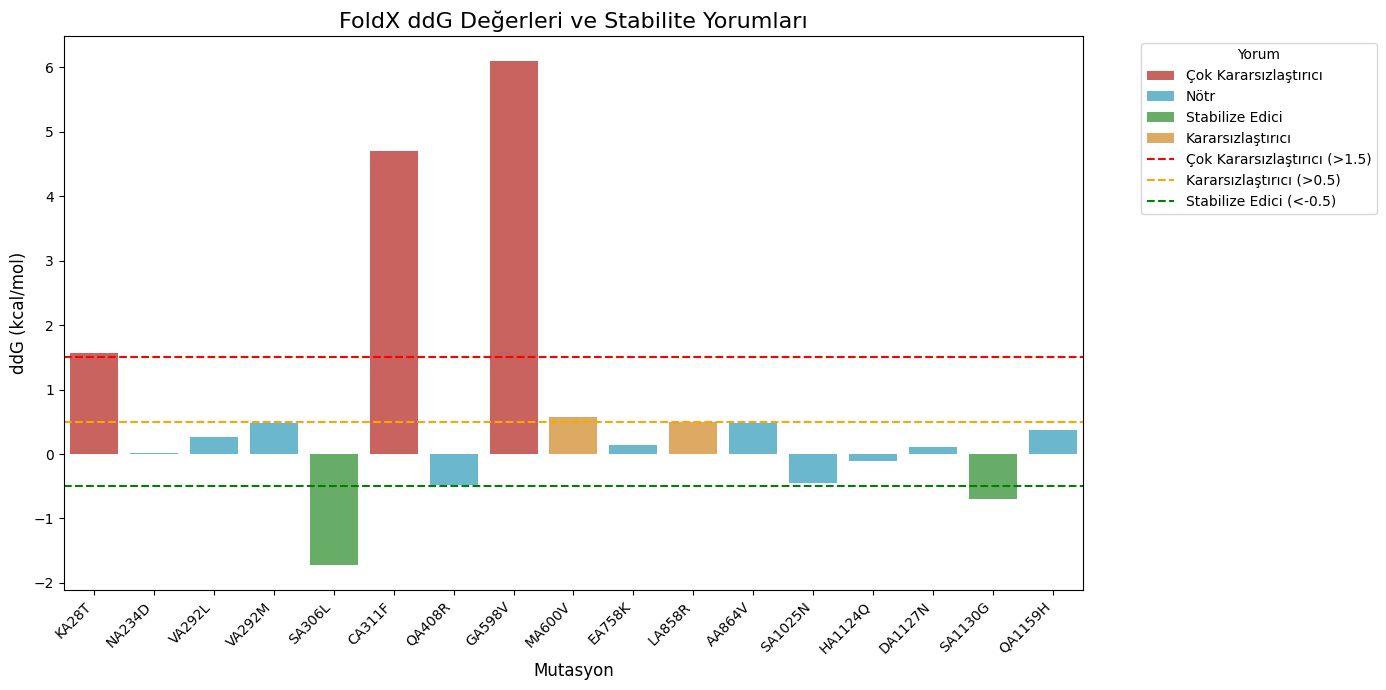

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the mutations_list as provided in the problem description.
mutations_list = [
    "KA28T", "NA234D", "VA292L", "VA292M", "SA306L", "CA311F", "QA408R",
    "GA598V", "MA600V", "EA758K", "LA858R", "AA864V", "SA1025N",
    "HA1124Q", "DA1127N", "SA1130G", "QA1159H"
]

# 2. Create a mutation_mapping dictionary to map PDB file names to mutation names.
mutation_mapping = {
    f"EGFR_AlphaFold_Repair_{i+1}.pdb": mutations_list[i]
    for i in range(len(mutations_list))
}

# 3. Add a new column named `Mutation_Name` to the `summary` DataFrame
#    by mapping the `Mutation` column using `mutation_mapping`.
#    Handle cases where the mutation name might not be found (e.g., WT or other files).
summary['Mutation_Name'] = summary['Mutation'].apply(
    lambda x: mutation_mapping.get(x, x.replace('.pdb', ''))
)

# 4. Define a dictionary `colors` for the `Interpretation` categories.
colors = {
    "Highly Destabilizing": "#D9534F",  # Red
    "Destabilizing": "#F0AD4E",         # Orange
    "Neutral": "#5BC0DE",               # Blue
    "Stabilizing": "#5CB85C"            # Green
}

# 5. Create a new figure with a specified size (e.g., 14x7 inches).
plt.figure(figsize=(14, 7))

# 6. Generate a bar plot using `seaborn.barplot()` with `Mutation_Name` on the x-axis,
#    `ddG (kcal/mol)` on the y-axis, and `Interpretation` for coloring.
sns.barplot(
    data=summary,
    x='Mutation_Name',
    y='ddG (kcal/mol)',
    hue='Interpretation',
    palette=colors,
    dodge=False
)

# 7. Set the title and axis labels.
plt.title('FoldX ddG Values and Stability Interpretations', fontsize=16)
plt.xlabel('Mutation', fontsize=12)
plt.ylabel('ddG (kcal/mol)', fontsize=12)

# 8. Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45, ha='right')

# 9. Add horizontal lines to indicate interpretation thresholds.
plt.axhline(y=1.5, color='red', linestyle='--', label='Highly Destabilizing (>1.5)')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Destabilizing (>0.5)')
plt.axhline(y=-0.5, color='green', linestyle='--', label='Stabilizing (< -0.5)')

# 10. Add a legend with a title and adjusted position.
plt.legend(title='Interpretation', bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Adjust the plot layout to prevent label overlap.
plt.tight_layout()

# 12. Display the plot.
plt.show()


### Stability Profile Visualization

**Purpose:** Generate a comprehensive bar plot displaying ΔΔG values for all mutations with color-coded stability classifications. Visual representation facilitates rapid identification of highly destabilizing mutations that may impair protein function or alter disease phenotype.

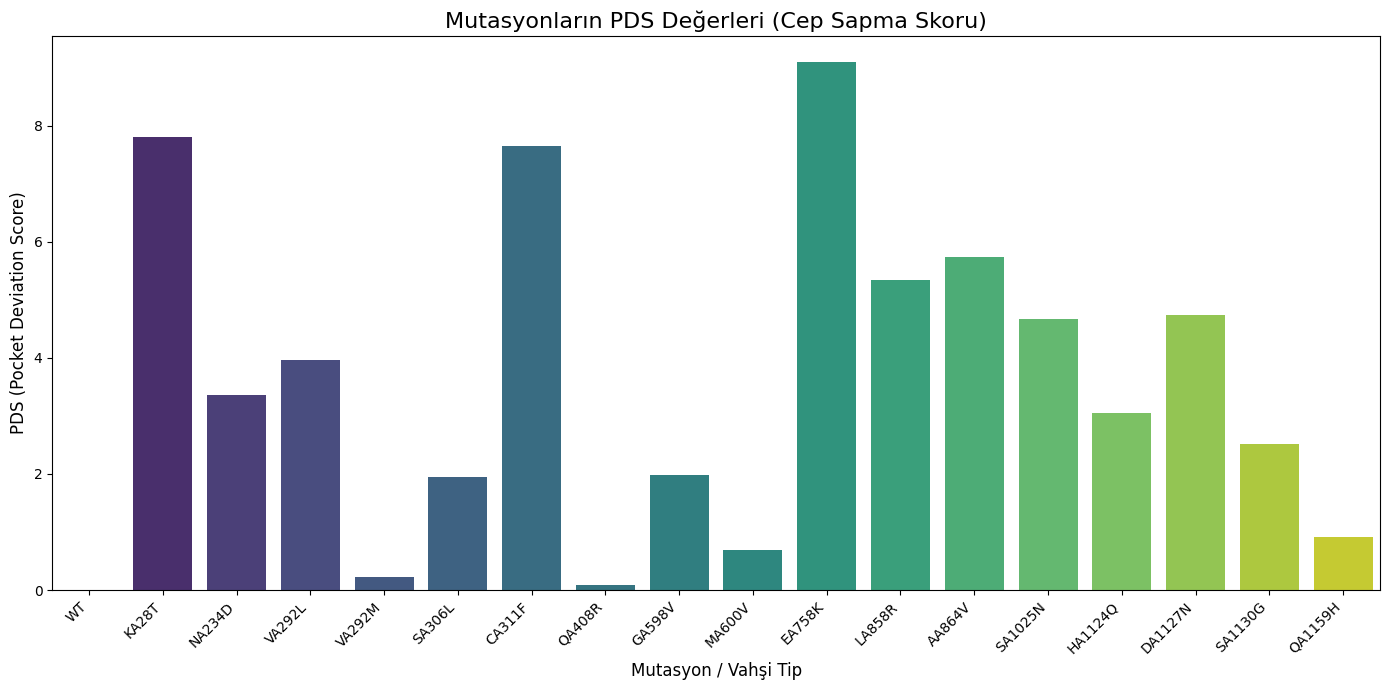

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for plotting and add a 'Mutation_Name' column
pds_df_plot = pds_df.copy()

# Original mutation list (without semicolons) to map back to PDB file names
mutations_list = [
    "KA28T", "NA234D", "VA292L", "VA292M", "SA306L", "CA311F", "QA408R",
    "GA598V", "MA600V", "EA758K", "LA858R", "AA864V", "SA1025N",
    "HA1124Q", "DA1127N", "SA1130G", "QA1159H"
]

# Map structure names to actual mutation names or 'WT'
def get_mutation_or_wt_name(structure_name):
    if structure_name == 'EGFR_AlphaFold_Repair':
        return 'WT'
    else:
        # Extract the number from 'EGFR_AlphaFold_Repair_X'
        index_str = structure_name.replace('EGFR_AlphaFold_Repair_', '')
        try:
            index = int(index_str)
            # -1 because mutations_list is 0-indexed and PDB file names are 1-indexed
            return mutations_list[index - 1]
        except (ValueError, IndexError):
            return structure_name  # Fallback if parsing fails

pds_df_plot['Mutation_Name'] = pds_df_plot['Structure'].apply(get_mutation_or_wt_name)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='Mutation_Name',
    y='PDS',
    data=pds_df_plot,
    palette='viridis',
    hue='Mutation_Name',
    legend=False
)

plt.title('PDS Values of Mutations (Pocket Deviation Score)', fontsize=16)
plt.xlabel('Mutation / Wild Type', fontsize=12)
plt.ylabel('PDS (Pocket Deviation Score)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Pocket Deviation Visualization

**Purpose:** Visualize PDS values across all mutations to identify variants causing significant geometric perturbations in the binding site. High PDS scores indicate substantial pocket remodeling, which may alter ligand recognition or drug binding affinity.

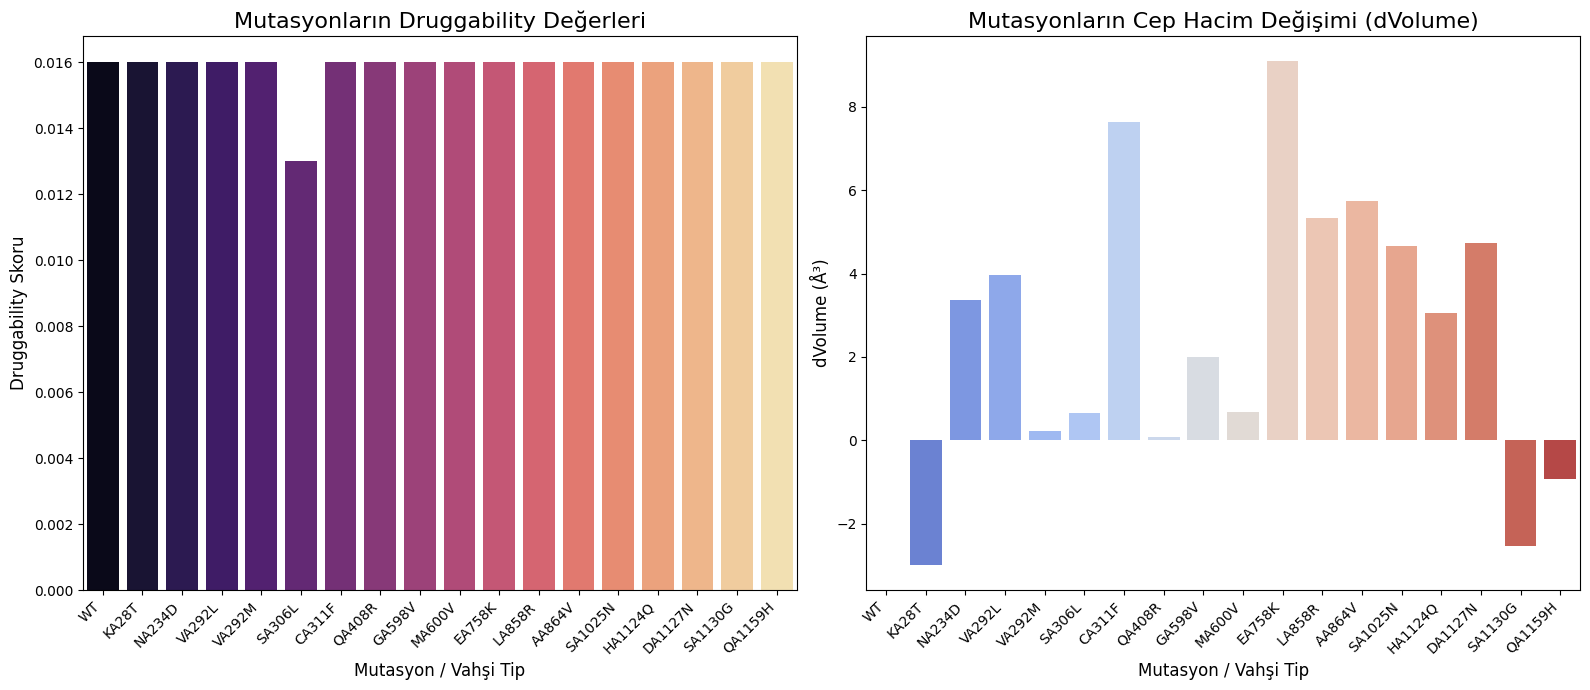

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for plotting and add a 'Mutation_Name' column if not already present
pds_df_plot = pds_df_plot if 'pds_df_plot' in locals() else pds_df.copy()

# Map structure names to actual mutation names or 'WT'
def get_mutation_or_wt_name(structure_name):
    if structure_name == 'EGFR_AlphaFold_Repair':
        return 'WT'
    else:
        # Original mutation list (without semicolons) to map back to PDB file names
        mutations_list = [
            "KA28T", "NA234D", "VA292L", "VA292M", "SA306L", "CA311F", "QA408R",
            "GA598V", "MA600V", "EA758K", "LA858R", "AA864V", "SA1025N",
            "HA1124Q", "DA1127N", "SA1130G", "QA1159H"
        ]
        # Extract the number from 'EGFR_AlphaFold_Repair_X'
        index_str = structure_name.replace('EGFR_AlphaFold_Repair_', '')
        try:
            index = int(index_str)
            # -1 because mutations_list is 0-indexed and PDB file names are 1-indexed
            return mutations_list[index - 1]
        except (ValueError, IndexError):
            return structure_name  # Fallback if parsing fails

pds_df_plot['Mutation_Name'] = pds_df_plot['Structure'].apply(get_mutation_or_wt_name)

# -----------------------------------------------------
# 3. Visualize Pocket Druggability and Volume Changes
# -----------------------------------------------------

plt.figure(figsize=(16, 7))

# Subplot 1: Druggability
plt.subplot(1, 2, 1)
sns.barplot(
    x='Mutation_Name',
    y='Druggability',
    data=pds_df_plot,
    palette='magma',
    hue='Mutation_Name',
    legend=False
)
plt.title('Druggability Values of Mutations', fontsize=16)
plt.xlabel('Mutation / Wild Type', fontsize=12)
plt.ylabel('Druggability Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Subplot 2: dVolume
plt.subplot(1, 2, 2)
sns.barplot(
    x='Mutation_Name',
    y='dVolume',
    data=pds_df_plot,
    palette='coolwarm',
    hue='Mutation_Name',
    legend=False
)
plt.title('Pocket Volume Change of Mutations (dVolume)', fontsize=16)
plt.xlabel('Mutation / Wild Type', fontsize=12)
plt.ylabel('dVolume (Å³)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


### Druggability and Volume Analysis

**Purpose:** Compare druggability scores and pocket volume changes across mutations. Druggability quantifies the likelihood of successful small-molecule targeting, while volume changes indicate cavity expansion or contraction that may affect drug accommodation.

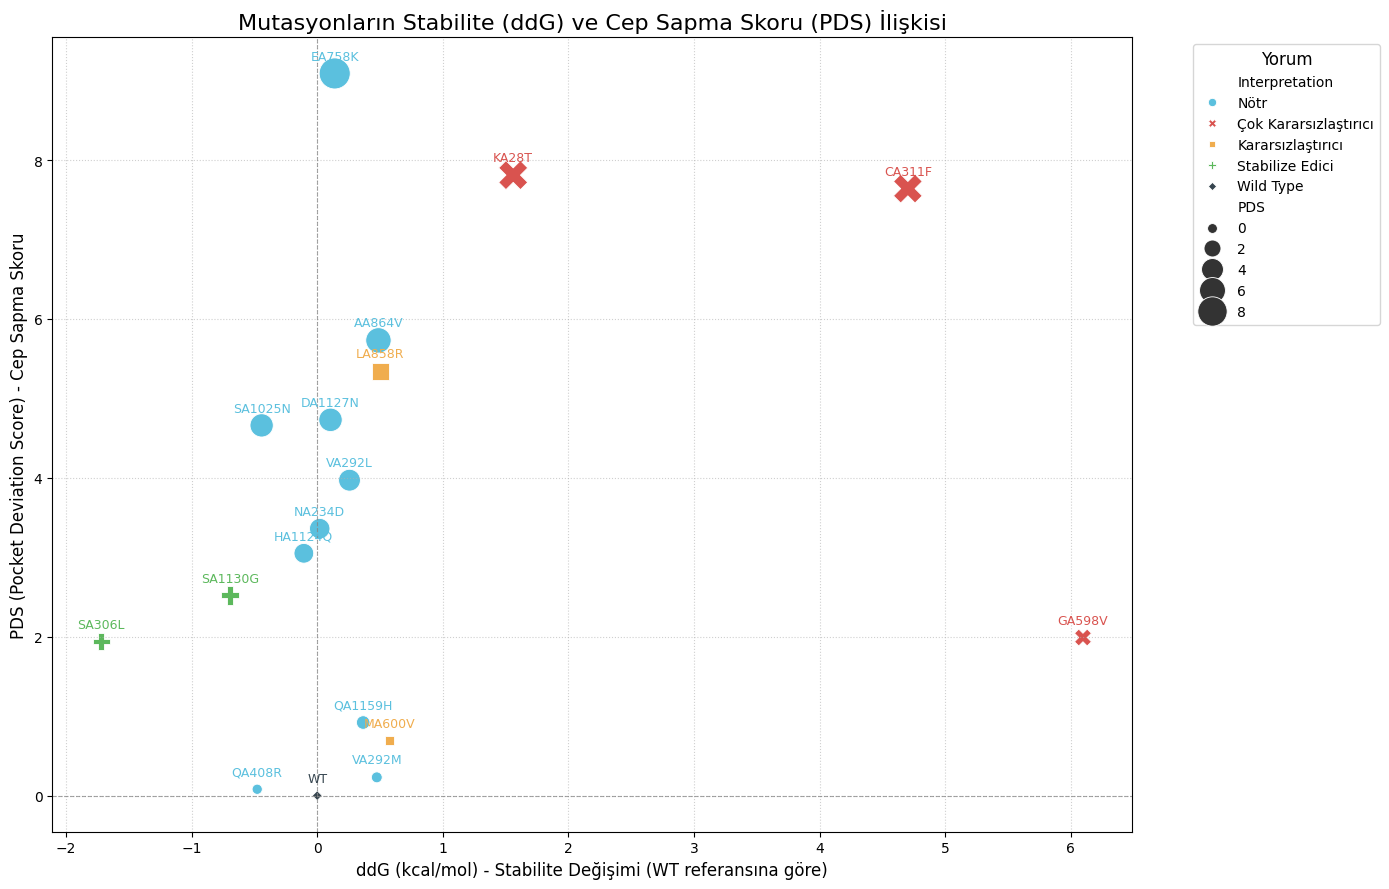

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure pds_df_plot is available and has 'Mutation_Name' populated.
# If this cell is run independently, re-run the necessary preceding cells.
# Assuming `summary` and `pds_df_plot` are available from previous steps.

# Select relevant columns from summary
summary_for_merge = summary[['Mutation_Name', 'ddG (kcal/mol)', 'Interpretation']]

# Select relevant columns from pds_df_plot
pds_for_merge = pds_df_plot[['Mutation_Name', 'PDS']]

# Merge the datasets. Use 'outer' to keep 'WT' from pds_for_merge and fill ddG with 0.
# This ensures that both mutants and WT are included.
combined_df = pd.merge(summary_for_merge, pds_for_merge, on='Mutation_Name', how='outer')

# For 'WT', ddG should be 0 and interpretation should be 'Wild Type'
combined_df.loc[combined_df['Mutation_Name'] == 'WT', 'ddG (kcal/mol)'] = 0
combined_df.loc[combined_df['Mutation_Name'] == 'WT', 'Interpretation'] = 'Wild Type'

# Ensure PDS for WT is 0 (explicitly set for robustness)
combined_df.loc[combined_df['Mutation_Name'] == 'WT', 'PDS'] = 0

# Drop rows that still contain NaN values in ddG or PDS
combined_df = combined_df.dropna(subset=['ddG (kcal/mol)', 'PDS'])

# Define custom colors for interpretation categories, including Wild Type
comparison_colors = {
    "Çok Kararsızlaştırıcı": "#D9534F",  # Red
    "Kararsızlaştırıcı": "#F0AD4E",     # Orange
    "Nötr": "#5BC0DE",                  # Blue
    "Stabilize Edici": "#5CB85C",       # Green
    "Wild Type": "#36454F"              # Charcoal
}

plt.figure(figsize=(14, 9))  # Adjust figure size for better readability of annotations

sns.scatterplot(
    data=combined_df,
    x='ddG (kcal/mol)',
    y='PDS',
    hue='Interpretation',
    style='Interpretation',   # Use style to improve accessibility (e.g., colorblindness)
    size='PDS',               # Scale point size by PDS
    sizes=(50, 500),
    palette=comparison_colors
)

# Add annotations for each point
for i, row in combined_df.iterrows():
    plt.annotate(
        row['Mutation_Name'],
        (row['ddG (kcal/mol)'], row['PDS']),
        textcoords="offset points",
        xytext=(0, 10),        # Slight vertical offset
        ha='center',
        fontsize=9,
        color=comparison_colors.get(row['Interpretation'], 'black')
    )

plt.title('Relationship Between Stability (ddG) and Pocket Deviation Score (PDS)', fontsize=16)
plt.xlabel('ddG (kcal/mol) – Stability Change (relative to WT)', fontsize=12)
plt.ylabel('PDS (Pocket Deviation Score)', fontsize=12)

# Reference lines for WT (no change)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Interpretation', bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()


### Integrated Stability-Pocket Analysis

**Purpose:** Create a scatter plot correlating ΔΔG with PDS to reveal relationships between protein stability and binding pocket geometry. This integrated analysis identifies mutations that simultaneously destabilize the protein and distort the binding site, potentially leading to drug resistance.

In [31]:
import os

# === FILE LIST ===
input_pdbs = ["/content/EGFR_AlphaFold_Repair.pdb"] + [
    f"/content/EGFR_AlphaFold_Repair_{i}.pdb" for i in range(1, 18)
]

output_dir = "/content/clean"
os.makedirs(output_dir, exist_ok=True)

# === ELEMENT INFERENCE (UNCHANGED) ===
def infer_element(atom_name):
    atom_name = atom_name.strip()

    if atom_name.startswith("C"):
        return "C"
    if atom_name.startswith("N"):
        return "N"
    if atom_name.startswith("O"):
        return "O"
    if atom_name.startswith("S"):
        return "S"
    if atom_name.startswith("H"):
        return "H"

    return atom_name[0].upper()

# === CLEAN FUNCTION ===
def clean_pdb(input_pdb, output_pdb):
    atom_serial = 1

    with open(input_pdb) as f, open(output_pdb, "w") as out:
        for line in f:
            if line.startswith(("ATOM", "HETATM")):
                atom_name = line[12:16]
                element = infer_element(atom_name)

                out.write(
                    f"{line[:6]}"
                    f"{atom_serial:5d} "
                    f"{line[12:16]}"
                    f"{line[16:17]}"
                    f"{line[17:20]} "
                    f"{line[21:22]}"
                    f"{line[22:26]}"
                    f"{line[26:30]}"
                    f"{float(line[30:38]):8.3f}"
                    f"{float(line[38:46]):8.3f}"
                    f"{float(line[46:54]):8.3f}"
                    f"{float(line[54:60]):6.2f}"
                    f"{float(line[60:66]):6.2f}"
                    f"{'':10}"
                    f"{element:>2}\n"
                )
                atom_serial += 1

        out.write("TER\nEND\n")

# === RUN IN BATCH ===
for pdb in input_pdbs:
    if os.path.exists(pdb):
        out_name = os.path.basename(pdb).replace(".pdb", "_clean.pdb")
        out_path = os.path.join(output_dir, out_name)
        clean_pdb(pdb, out_path)
        print(f"Cleaned: {out_name}")
    else:
        print(f"File not found: {pdb}")

print("\nAll WT + 17 mutant PDB files have been cleaned.")


✅ Cleaned: EGFR_AlphaFold_Repair_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_1_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_2_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_3_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_4_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_5_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_6_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_7_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_8_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_9_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_10_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_11_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_12_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_13_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_14_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_15_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_16_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_17_clean.pdb

🎯 Tüm WT + 17 mutasyon PDB clean edildi.


## 8. Molecular Docking Preparation

**Purpose:** Clean and standardize PDB files by correcting atom numbering, adding proper element identifiers, and ensuring format compliance. Proper structure preparation is prerequisite for accurate molecular docking simulations with AutoDock Vina.

In [32]:
!apt-get install -y autodocktools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package autodocktools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'autodocktools' has no installation candidate


### Docking Tools Installation

**Purpose:** Install AutoDockTools and dependencies required for receptor preparation and PDBQT format conversion, enabling molecular docking simulations with AutoDock Vina.

In [35]:
!apt-get install -y python2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2-minimal
  python2.7 python2.7-minimal
Suggested packages:
  python2-doc python-tk python2.7-doc binfmt-support
The following NEW packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2
  python2-minimal python2.7 python2.7-minimal
0 upgraded, 7 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,012 kB of archives.
After this operation, 16.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libpython2.7-minimal amd64 2.7.18-13ubuntu1.5 [347 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python2.7-minimal amd64 2.7.18-13ubuntu1.5 [1,400 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python2-minimal amd64 2.7.18-3 [20.8 

In [36]:
import os
import subprocess

# Path to AutoDockTools script used to prepare receptor files
PREPARE_RECEPTOR = "/usr/share/mgltools/MGLToolsPckgs/AutoDockTools/Utilities24/prepare_receptor4.py"

# Directory containing cleaned PDB files
clean_dir = "/content/clean"

# Output directory for generated PDBQT files
pdbqt_dir = "/content/pdbqt"
os.makedirs(pdbqt_dir, exist_ok=True)

# Collect all cleaned PDB files (_clean.pdb) from the clean directory
clean_pdbs = [f for f in os.listdir(clean_dir) if f.endswith("_clean.pdb")]

# Loop over each cleaned PDB file
for pdb in clean_pdbs:
    # Full path of the input cleaned PDB file
    input_pdb = os.path.join(clean_dir, pdb)

    # Define output PDBQT file name and path
    output_pdbqt = os.path.join(
        pdbqt_dir, pdb.replace("_clean.pdb", ".pdbqt")
    )

    # Command to prepare receptor using AutoDockTools
    # -r : input receptor file
    # -o : output PDBQT file
    # -A hydrogens : add polar hydrogens
    cmd = [
        "python2", PREPARE_RECEPTOR,
        "-r", input_pdb,
        "-o", output_pdbqt,
        "-A", "hydrogens"
    ]

    # Run the receptor preparation command
    subprocess.run(cmd)

    # Inform the user that the PDBQT file has been generated
    print(f"Receptor PDBQT generated: {output_pdbqt}")

# Final message indicating completion for all WT and mutant structures
print("\nALL WT + 17 MUTANT receptor PDBQT files are READY")


✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_5.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_13.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_3.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_2.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_16.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_1.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_8.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_4.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_9.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_10.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_12.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_17.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repa

### Receptor Preparation

**Purpose:** Convert all cleaned PDB structures to PDBQT format by adding polar hydrogens and computing partial charges using AutoDockTools. PDBQT format contains essential information for calculating protein-ligand interactions during docking simulations.

In [42]:
# Generate a 3D structure from the given SMILES string and convert it to PDBQT format
# -:"SMILES"     : Input molecule in SMILES notation (erlotinib)
# -O             : Output file in PDBQT format
# --gen3d        : Generate 3D coordinates for the molecule

!obabel -:"COC1=CC=C(C=C1)NC2=NC=NC3=CC(=C(C=C23)C#C)OC" \
  -O /content/erlotinib.pdbqt \
  --gen3d


1 molecule converted


## 9. Ligand Preparation

**Purpose:** Generate a 3D structure of erlotinib (an EGFR tyrosine kinase inhibitor) from SMILES notation and convert to PDBQT format. Erlotinib is a clinically approved drug used to assess how mutations affect therapeutic binding affinity.

In [46]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_10_clean.pdb)

1 molecule converted


In [47]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

## 10. Molecular Docking Simulations

**Purpose:** Perform AutoDock Vina docking to predict erlotinib binding poses and calculate binding affinity for each structure. The grid box coordinates define the ATP-binding site where erlotinib competitively inhibits EGFR. Comparing binding energies across mutations reveals how structural changes affect drug efficacy.

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_1_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_1_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_1_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_2_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_2_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_2_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_3_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_3_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_3_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_4_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_4_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_4_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_5_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_5_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_6_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_6_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_6_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_6_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_7_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_7_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_7_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_8_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_8_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_8_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_9_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_9_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_9_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_10_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_10_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_10_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_11_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_11_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_11_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_12_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_12_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_12_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_13_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_13_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_13_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_14_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_14_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_14_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_15_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_15_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_15_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_16_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_16_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_16_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

In [ ]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_17_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_17_clean.pdbqt \
        -xr -xh

In [ ]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_17_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt